# Linear regression IV

## With multiple variables (Multivariate linear regression)

This one is more powerfull that works with multiple features (variables). Previously we mapped <code>**between a dependent variable(y) and one or more independent variables(x)**</code>

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# just for the nicer style

plt.style.use('seaborn-whitegrid')
from pandas import Series, DataFrame
from sklearn.datasets import load_boston

data_set = load_boston()
boston_df = DataFrame(data_set.data)
boston_df.columns = data_set.feature_names
boston_df['Kaina tūks. $'] = data_set.target
sample = boston_df[["RM", "Kaina tūks. $"]]
sample.head()

,RM,Kaina tūks. $
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


So we used a single feature x<code>**(RM)**</code> to predict y<code>**(the price).**</code> 
And this was our hypothesis:

$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x$$

But if we had more than one features. Like property age, tax and crime rate and etc. 

In [6]:
sample = boston_df
sample.head()
#print(data_set.DESCR)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Kaina tūks. $
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


This gives a lot more information to predict price. For all of these features(variables) we will use notation of <code>**x1, x2, x3, etc**</code>. For target(output variable) we will continue to use <code>**y**</code>. 

<code>**Notation**</code>:
 * <code>**n**</code> = number of features;
 * <code>**m**</code> = number of training samples;
 * <code>**x(i)**</code> = input variables <code>**(features)**</code> of i'th training example;
 * <code>**x(i)(j)**</code> = value of feature j in i'th training example.
 
Lets say x(2) is going to be a vector of features for our second training example :

\begin{equation*}x^{2} = 
\begin{bmatrix}
0.02731 \\
0.0  \\
7.07 \\
0.0  \\ 
0.0  \\
0.469\\
...
\end{bmatrix}
\in \mathbb{R^{n}}
\end{equation*}

So plainly superscipt is just an <code>**index into the training sample**</code>. And the subscirpt is the reference to training sample feature.

$$ x^{(2)}_3$$

## Practice exercise
In our training set above what is:

$$ x^{(4)}_6$$

Now that we have multiple features to deal with. What would our form of hypothesis shoud bel like ?
Previously with a single <code>**x**</code> feature it was :
$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x$$

Now it's going to be this:

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

Some arbitrary example would look like:

$$h_{\theta}(x) = 80 + 2.2x_{1} + 0.05x_{2} + 3x_{2} + 2.2x_{3} - 5.05x_{4}$$

<code>**Recap**</code> hypothesis is trying to predict the output value <code>**y**</code>with given input values <code>**x**</code>.

Lets simply this equation:
$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

For convenience of notation, define a <code>**zero'th feature that always take a value of 1.**</code>
$$ x^{(i)}_0 = 1$$

Now our feature <code>**vector 𝑥⃗**</code>  becomes n+1 dimensional vector that is zero indexed.

\begin{equation*}
x = 
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2} \\ 
...   \\
x_{n} \\
\end{bmatrix}
\in
\mathbb{R^{n+1}}
\end{equation*}

And our parameters can be a vector:
\begin{equation*}
\theta = 
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\ 
...   \\
\theta_{n} \\
\end{bmatrix}
\in
\mathbb{R^{n+1}}
\end{equation*}

So our hypothesis can we rewriten as:
$$h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n} = \vec{\theta^\top} \vec{x}$$

\begin{equation*}
\begin{bmatrix}
\theta_{0} \theta_{1} \theta_{2}  ... \theta_{n}
\end{bmatrix}
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2} \\ 
...   \\
x_{n} \\
\end{bmatrix}
= \theta^\top \ x
\end{equation*}

Its just an convienent way to write hypothesis as just the inner product between our parameter theta vector and our feature vector x and little notation allows us to do this:
$$ x^{(i)}_0 = 1$$


<IPython.core.display.Javascript object>


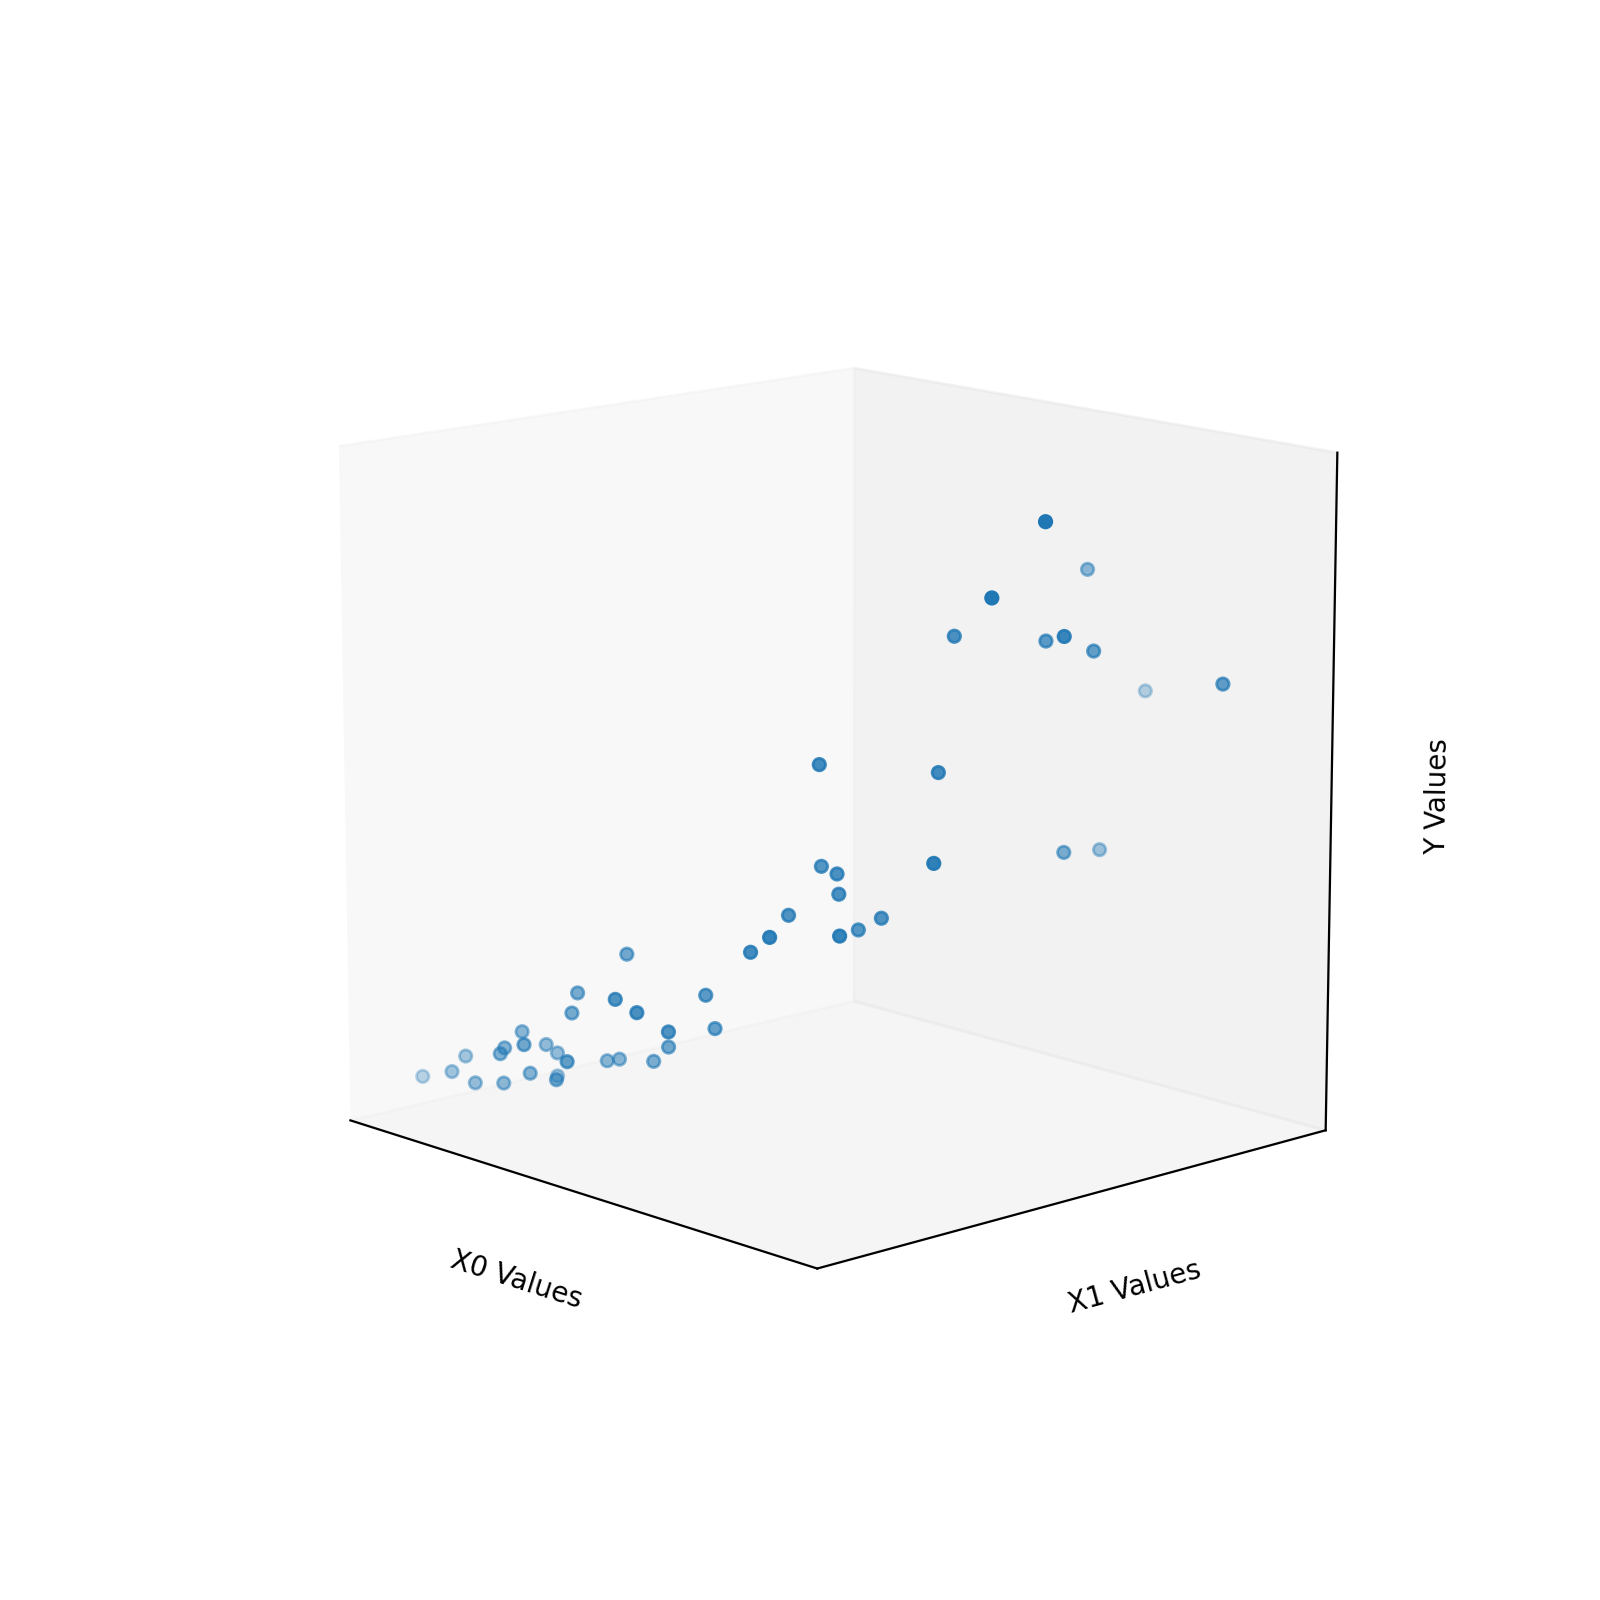

[]

In [2]:
#matplotlib inline
%matplotlib notebook
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = [[x/12+ random.uniform(-1,1) for x in range(0,50)], [2**(x/12)+ random.uniform(-1,1) for x in range(0,50)]]

theta = [0.2, 0.03, 0.7, 0.002, 0.04]
def var(i):
    return random.uniform(-(i[0]+i[1])/4,(i[0]+i[1])/4)

def y_of_x(xa):
    return theta[0]*xa[0]**2 + theta[1]*xa[0]*xa[1] + theta[2]*xa[0] + theta[3]*xa[1]**2 + theta[4]*xa[1] + 2.0 + var(xa)

Y = []
for xa in np.transpose(X):
    Y.append(y_of_x(xa))
    
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(X[0], X[1], Y)
ax.set_xlabel('X0 Values')
ax.set_ylabel('X1 Values')
ax.set_zlabel('Y Values')


ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

## Gradient descent for multiple variables

How to fit the parameters of that hypothesis, in other words how to use GD for linear regression with multiple features.

## Outline

<code>**Hypothesis**</code>:
\begin{multline*}
h_{\theta}(x) = \theta^\top x =  \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} +  ... +  \theta_{n}x_{n}
\end{multline*}
\begin{multline*}x_{0} = 1 \end{multline*}
<code>**Parameters, parameters vector**</code>:
\begin{multline*}
\vec{\theta} , n+1 \text{ dimensionl vector}
\end{multline*}

<code>**Cost function**</code>:
\begin{multline*}
J(\vec{\theta}) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2
\end{multline*}

<code>**Goal**</code>:
\begin{multline*}
\min(\theta_{0}, \theta_{1}, ..., \theta_{n})
\end{multline*}


## Gradient descent

<code>**Gradient descent:**</code><br>

`repeat until convergence (for j = 0, ..., n){
`\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\vec{\theta})
\end{multline*}
`}` <br>
<code>**Don't forget when implementing gradient descent that we must simultaneously update parameters !**</code>

### Recap

GD with single feature <code>**(n=1):**</code>

`Repeat until convergence {
`\begin{multline*}
\theta_{0} := \theta_{0} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)}) - y^{(i)})
\end{multline*} 

\begin{multline*}
\theta_{1} = \theta_{1} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}
\end{multline*}
`}`

GD with multiple features <code>**(n>1):**</code>

`Repeat until convergence {
`\begin{multline*}
\theta_{j} = \theta_{j} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{j}
\end{multline*}
`}`

Lets consider a case where we have <code>**three features**</code>

\begin{multline*}
\theta_{0} = \theta_{0} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{0} , x^{(i)}_{0} = 1
\end{multline*}
\begin{multline*}
\theta_{1} = \theta_{1} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{1}
\end{multline*}
\begin{multline*}
\theta_{2} = \theta_{2} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{2}
\end{multline*}

## Feature Scaling

Making sure that features are on a similr scale:
 * x(1) = size (5-250 sqr.m)
 * x(2) = number of rooms (1-5)

Otherwise if features have large scale differences it turns out that the contours of cost function J(θ) can take very skew eliptical shape. The larger scale difference the more skewer it will be.

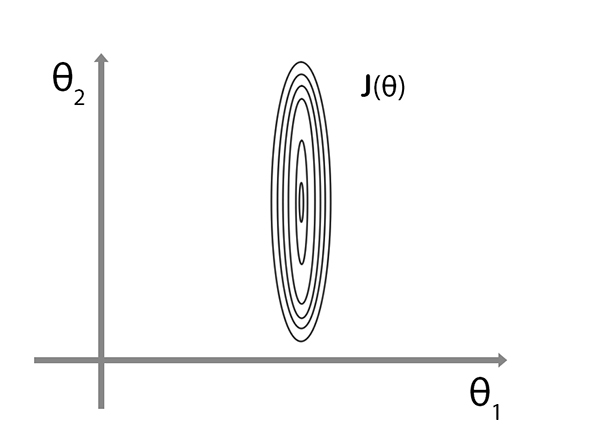

When we run gradient descent on this sort of shape cost function, algorithm can take quite a long time to converge. Oscillate meandering back and forth on a convoluted path untill finding a way to global minimum.

In this particular settings to avoid that we should scale the features:
 * x(1) = size sqr.m / 250
 * x(2) = no. rooms / 5
 
Then the contours of cost function J(θ) can become much less skew and more like circles. Gradient descent algorithm will run in much more direct path towards global minimum <code>**(mathematically provable)**</code>
 
 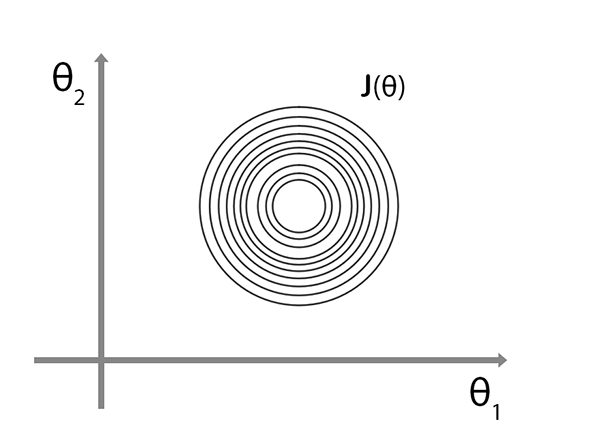

<code>**Generally try to get every feature into approximately this range for optimal performance:**</code>

$$ -1 \leq x_{i} \leq 1 $$

Its fine if you manage to get close enough, the rule of thumb is a range like <code>**-3 to 3**</code>:

$$ 0 \leq x_{1} \leq 3 $$

$$ -2 \leq x_{2} \leq 0.5 $$

$$ -\dfrac{1}{3} \leq x_{3}  \leq \dfrac{1}{3} $$

<code>**These are not okay!:**</code>

$$ -0.001 \leq x_{4} \leq 0.001 $$

$$ -100 \leq x_{5} \leq 100 $$

### Mean normalization

<code>**Replace x(i) with x(i) - u(1)**</code> to make features have approximately zero mean.<code>**(Do not apply to x(0) = 1).**</code>

E.g:
 * x(1) = size sqr.m - 100 / 190
 * x(2) = no. rooms - 2 / 6
 
 $$ -0.5 \leq x_{1} \leq 0.5,  -0.5 \leq x_{2} \leq 0.5 $$
 -----------------------------------------------------------
 $$ x_{i} \leftarrow \dfrac{x_{i}- \mu_{i}}{s_{i}}$$
 
* u(i) is average value in the training set
* s(i) is the range (max-min) or it can be standart deviation 

<code>**Feature scalling does not have to be exact, just aim for good enough.**</code>

## Learning rate

## Outline

\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\vec{\theta})
\end{multline*}

How to debug and make sure gradient descent is working correctly ? How to choose learning rate α (alpha) correctly ?
So the job of gradient descent is to find a value of theta that minimizes cost function.
It usefull to plot J(θ) as gradient descent runs.



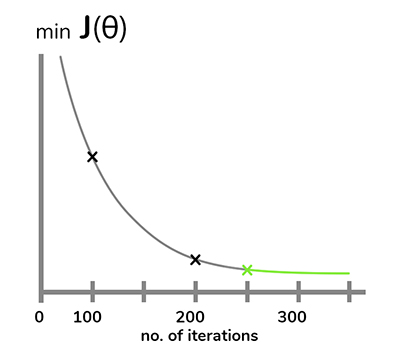

This chart shows value of J(θ) after each iteration. If GD work properly this value should decrease after each iteration.
And when GD converges its stops to deacrese rapidly. 

Sometimes for real applications GD can take a lot of iterations to converge. And that various a lot, it can 300 or 300000 no. of iterations.

It's very practical to have <code>**automatic convergance test**</code> that declares convergance if J(θ) decreases by less than some small value like <code>**10 to the power of -2**</code> in one iteration. But its hard to define this threshold correctly.

 * For sufficiently small alpha, J(θ) should decrease on every iteration;
 * But if alpha is too small, gradient descent can be slow to converge;
 * If alpha rate to large  J(θ) may not decrease on every iteration, may not even converge.
 

## Practice homework 


<code>**Choose alpha candidates : 0.001-0.003, 0.01-0.03, 0.1-0.3, 1 and plot J(θ) with all learning rates.**</code>
 
To do that lets build a small script with everything we have learned. Don't worry if you struggle it takes time to fit all pieces together. Do your reading, take your time , do some paper calculations and don't worry.<br>
Most important concepts outline:

<code>**Hypothesis:**</code>
\begin{multline*}
h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} +  ... +  \theta_{n}x_{n} = \theta^\top x 
\end{multline*}

<code>**Goal**</code>:
\begin{multline*}
\min(\theta_{0}, \theta_{1}, ..., \theta_{n})
\end{multline*}

<code>**Cost function**</code>:
\begin{multline*}
J(\vec{\theta}) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2
\end{multline*}

<code>**Feature scaling (Mean normalization)**</code>

\begin{multline*} 
x_{i} \leftarrow \dfrac{x_{i}- \mu_{i}}{s_{i}}
\end{multline*}

<code>**Gradient descent:**</code>

\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\vec{\theta})
\end{multline*}

-----------------------------------------------------------------------------------------
\begin{multline*}
\theta_{j} = \theta_{j} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{j}
\end{multline*}

<code>**RECAP: Notations used:**</code>
 * <code>**m**</code> = no of training examples (no of rows of feature matrix)
 * <code>**n**</code> = no of features (no of columns of feature matrix)
 * <code>**x’s**</code> = input variables / independent variables / <code>**features**</code>
 * <code>**y’s**</code> = output variables / dependent variables / <code>**target/label**</code>
 * <code>**x(i)**</code> = input variables <code>**(features)**</code> of i'th training example;
 * <code>**x(i)(j)**</code> = value of feature j in i'th training example.

Multivariate linear regression class skeleton but you can change it as you see fit your task neeeds. <code>**Its mandatory to go through [linear algera basics](../__appendix/linear_algebra/__matrices_and_vectors.ipynb) to get the intuition of vectorized operations**</code>

<div class="alert alert-block alert-info">
<h2>Vectorization</h2>
    
It is the process of converting an algorithm from operating on a single value at a time to operating on a set of values at one time
</div>

<code>**dataset for this assignment is [here](../data_samples/multivariate_housing_prices.csv)**</code>

<code>**TIP**</code>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('../data_samples/multivariate_housing_prices.csv')
X = df.values[:, 0:2]  # get input values from first two columns
y = df.values[:,   2]  # get output values from last coulmn

In [74]:
df.head()

,size(in square feet),number of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [75]:
X

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4],
       [1985,    4],
       [1534,    3],
       [1427,    3],
       [1380,    3],
       [1494,    3],
       [1940,    4],
       [2000,    3],
       [1890,    3],
       [4478,    5],
       [1268,    3],
       [2300,    4],
       [1320,    2],
       [1236,    3],
       [2609,    4],
       [3031,    4],
       [1767,    3],
       [1888,    2],
       [1604,    3],
       [1962,    4],
       [3890,    3],
       [1100,    3],
       [1458,    3],
       [2526,    3],
       [2200,    3],
       [2637,    3],
       [1839,    2],
       [1000,    1],
       [2040,    4],
       [3137,    3],
       [1811,    4],
       [1437,    3],
       [1239,    3],
       [2132,    4],
       [4215,    4],
       [2162,    4],
       [1664,    2],
       [2238,    3],
       [2567,    4],
       [1200,    3],
       [ 852,    2],
       [1852,    4],
       [1203,    3]], dtype=int64)

In [76]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

Lets visualize our data

Text(0.5, 0, 'price')

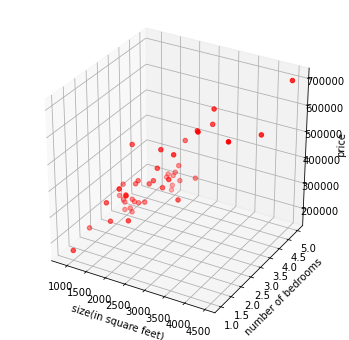

In [79]:
%matplotlib inline
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, c='red')
ax.set_xlabel('size(in square feet)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price')

<code>**Our hypothesis in this particular case is**</code>

\begin{multline*}
h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}
\end{multline*}


<div class="alert alert-block alert-info">
<h2>Plane function</h2>
    
Our hypothesis looks very similar to <code>**plane function**</code> which makes sense if we will mentally visualize how our linear regression prediction (plane) would look like ploted on 3D

\begin{multline*}
a(x-x_{0}) + b(y-y_{0}) + c(z-z_{0}) =  0
\end{multline*}

which is the point–normal form of the equation of a plane.This is just a linear equation:

\begin{multline*}
ax + by + cz + d =  0
\end{multline*}

### Mean normalization

\begin{multline*} 
x_{i} \leftarrow \dfrac{x_{i}- \mu_{i}}{\sigma_{i}}
\end{multline*}

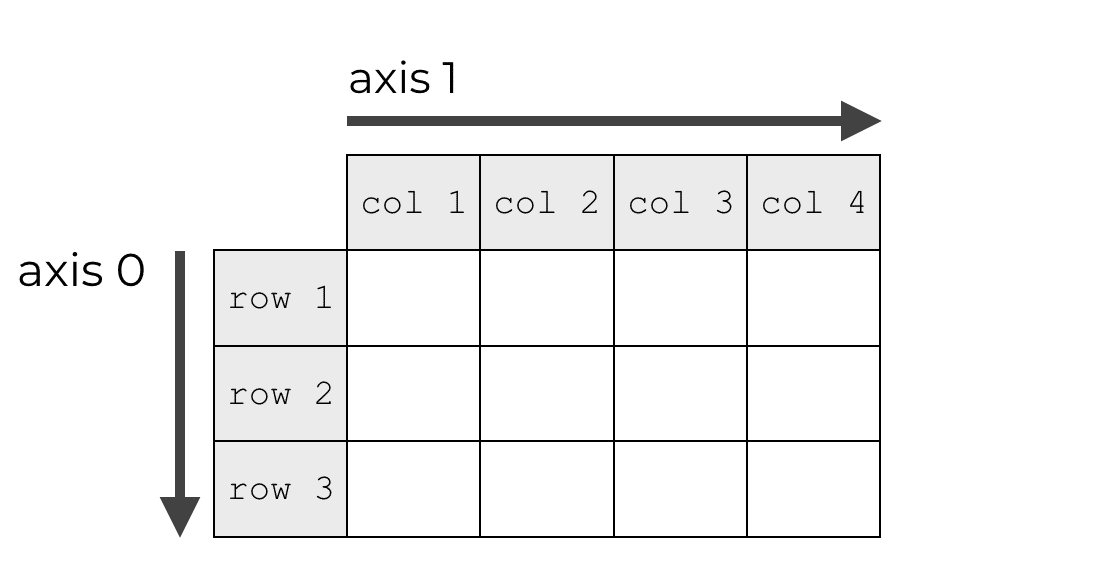

In [7]:
mu = np.mean(X, axis=0)


In [8]:
sig = np.std(X, axis=0)
sig

array([7.86202619e+02, 7.52842809e-01])

In [9]:
normalized =  np.round_((X - mu)/sig, decimals=2)
normalized

array([[ 0.13, -0.23],
       [-0.51, -0.23],
       [ 0.51, -0.23],
       [-0.74, -1.55],
       [ 1.27,  1.1 ],
       [-0.02,  1.1 ],
       [-0.59, -0.23],
       [-0.73, -0.23],
       [-0.79, -0.23],
       [-0.64, -0.23],
       [-0.08,  1.1 ],
       [-0.  , -0.23],
       [-0.14, -0.23],
       [ 3.15,  2.43],
       [-0.93, -0.23],
       [ 0.38,  1.1 ],
       [-0.87, -1.55],
       [-0.97, -0.23],
       [ 0.77,  1.1 ],
       [ 1.31,  1.1 ],
       [-0.3 , -0.23],
       [-0.14, -1.55],
       [-0.5 , -0.23],
       [-0.05,  1.1 ],
       [ 2.4 , -0.23],
       [-1.15, -0.23],
       [-0.69, -0.23],
       [ 0.67, -0.23],
       [ 0.25, -0.23],
       [ 0.81, -0.23],
       [-0.21, -1.55],
       [-1.27, -2.88],
       [ 0.05,  1.1 ],
       [ 1.45, -0.23],
       [-0.24,  1.1 ],
       [-0.72, -0.23],
       [-0.97, -0.23],
       [ 0.17,  1.1 ],
       [ 2.82,  1.1 ],
       [ 0.21,  1.1 ],
       [-0.43, -1.55],
       [ 0.3 , -0.23],
       [ 0.72,  1.1 ],
       [-1.

<code>**New mean or avearage value of normalized X feature is 0**</code<

In [10]:
mu_test = np.mean(normalized, axis=0)
mu_test

array([ 0.00021277, -0.00212766])

<code>**New range or standard deviation of normalized X feature is 1**</code>

In [11]:
sig_test = np.std(normalized, axis=0)
sig_test

array([0.99990742, 0.99868624])

\begin{multline*} 
x_{i} \leftarrow \dfrac{x_{i}- \mu_{i}}{\sigma_{i}}
\end{multline*}

In [12]:
def feature_normalize(X):
    mu = np.mean(X, axis = 0)  
    sigma = np.std(X, axis= 0, ddof = 1)
    normalize = (X - mu)/sigma
    normalize = np.round_(normalize, decimals=2)
    return normalize, mu, sigma

In [13]:
X_norm, mu, sigma = feature_normalize(X)

In [14]:
print(X_norm.mean(axis=0))
print(X_norm.std(axis=0))

[0.00042553 0.00148936]
[0.99006546 0.98882475]


In [15]:
X_norm

array([[ 0.13, -0.22],
       [-0.5 , -0.22],
       [ 0.5 , -0.22],
       [-0.74, -1.54],
       [ 1.26,  1.09],
       [-0.02,  1.09],
       [-0.59, -0.22],
       [-0.72, -0.22],
       [-0.78, -0.22],
       [-0.64, -0.22],
       [-0.08,  1.09],
       [-0.  , -0.22],
       [-0.14, -0.22],
       [ 3.12,  2.4 ],
       [-0.92, -0.22],
       [ 0.38,  1.09],
       [-0.86, -1.54],
       [-0.96, -0.22],
       [ 0.77,  1.09],
       [ 1.3 ,  1.09],
       [-0.29, -0.22],
       [-0.14, -1.54],
       [-0.5 , -0.22],
       [-0.05,  1.09],
       [ 2.38, -0.22],
       [-1.13, -0.22],
       [-0.68, -0.22],
       [ 0.66, -0.22],
       [ 0.25, -0.22],
       [ 0.8 , -0.22],
       [-0.2 , -1.54],
       [-1.26, -2.85],
       [ 0.05,  1.09],
       [ 1.43, -0.22],
       [-0.24,  1.09],
       [-0.71, -0.22],
       [-0.96, -0.22],
       [ 0.17,  1.09],
       [ 2.79,  1.09],
       [ 0.2 ,  1.09],
       [-0.42, -1.54],
       [ 0.3 , -0.22],
       [ 0.71,  1.09],
       [-1.

<IPython.core.display.Javascript object>


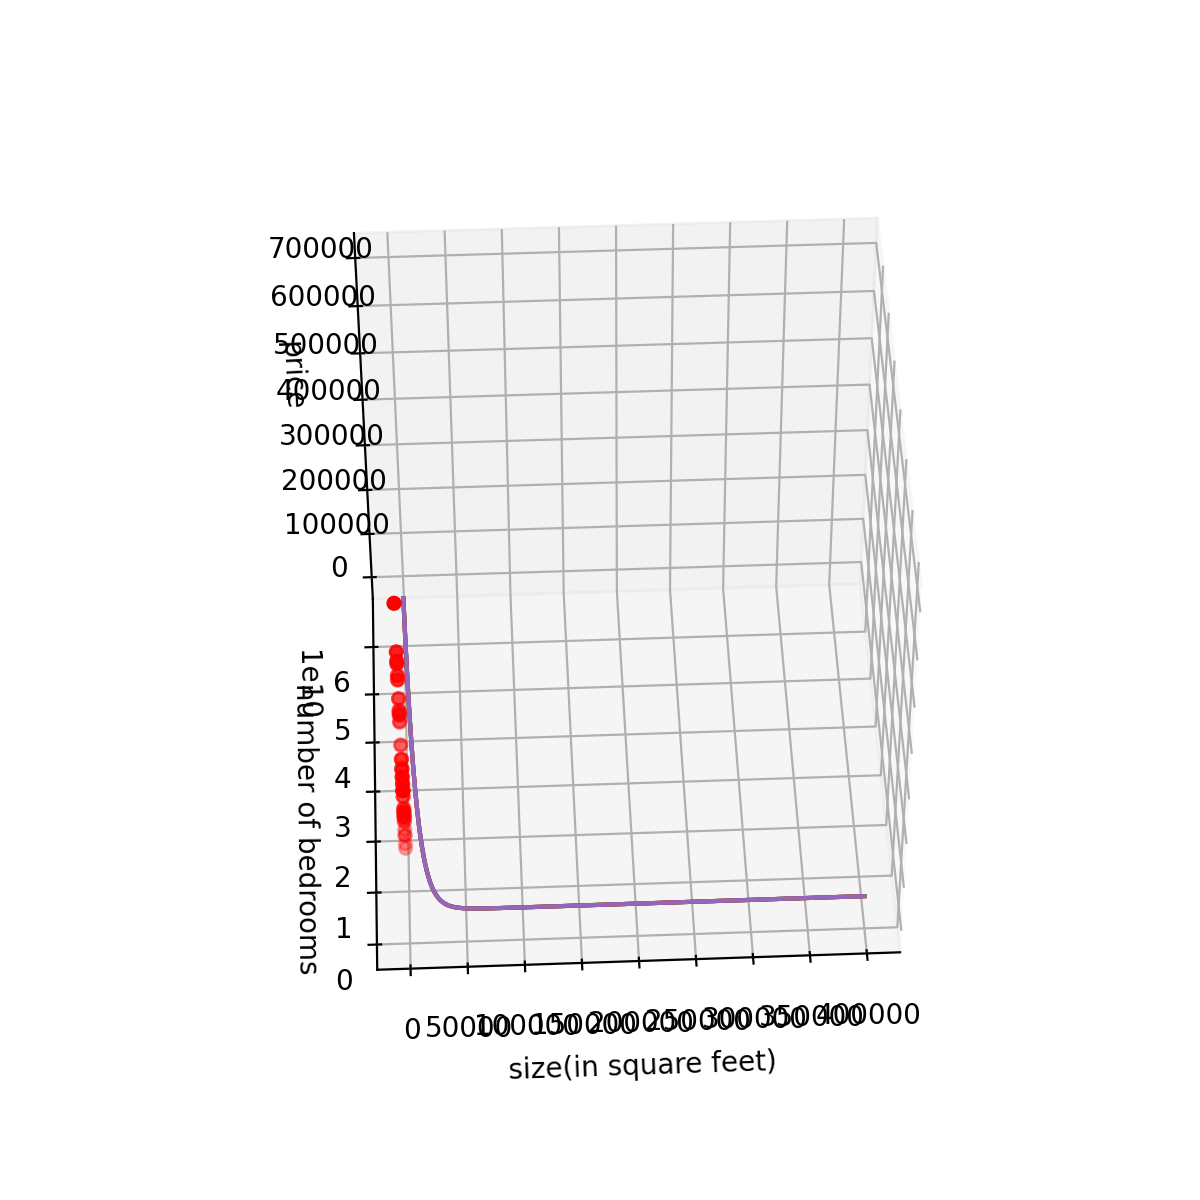

Text(0.5, 0, 'price')

In [16]:
%matplotlib notebook
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(X_norm[:,0], X_norm[:,1], y, c='red')
ax.set_xlabel('size(in square feet)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price')

Lets augment our X matrix with additionl feature column of 1's 

In [17]:
X = np.insert(X_norm, 0,1,axis=1)
X

array([[ 1.  ,  0.13, -0.22],
       [ 1.  , -0.5 , -0.22],
       [ 1.  ,  0.5 , -0.22],
       [ 1.  , -0.74, -1.54],
       [ 1.  ,  1.26,  1.09],
       [ 1.  , -0.02,  1.09],
       [ 1.  , -0.59, -0.22],
       [ 1.  , -0.72, -0.22],
       [ 1.  , -0.78, -0.22],
       [ 1.  , -0.64, -0.22],
       [ 1.  , -0.08,  1.09],
       [ 1.  , -0.  , -0.22],
       [ 1.  , -0.14, -0.22],
       [ 1.  ,  3.12,  2.4 ],
       [ 1.  , -0.92, -0.22],
       [ 1.  ,  0.38,  1.09],
       [ 1.  , -0.86, -1.54],
       [ 1.  , -0.96, -0.22],
       [ 1.  ,  0.77,  1.09],
       [ 1.  ,  1.3 ,  1.09],
       [ 1.  , -0.29, -0.22],
       [ 1.  , -0.14, -1.54],
       [ 1.  , -0.5 , -0.22],
       [ 1.  , -0.05,  1.09],
       [ 1.  ,  2.38, -0.22],
       [ 1.  , -1.13, -0.22],
       [ 1.  , -0.68, -0.22],
       [ 1.  ,  0.66, -0.22],
       [ 1.  ,  0.25, -0.22],
       [ 1.  ,  0.8 , -0.22],
       [ 1.  , -0.2 , -1.54],
       [ 1.  , -1.26, -2.85],
       [ 1.  ,  0.05,  1.09],
       [ 1

Lets compute the cost of a particular choice of theta for linear regression

\begin{multline*}
J(\Theta) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2
\end{multline*}

In [69]:
def calc_cost(X, y, thetas):
        m,n = X.shape
        y_hat = X.dot(thetas)
        error = (y_hat - y ) ** 2 
        return 1/(2 * m) * np.sum(error)

<code>**Vectorized form**</code>

\begin{multline*}
J(\Theta) = \dfrac{1}{2m}(X\Theta - \vec{y})^{\top}(X\Theta - \vec{y})
\end{multline*}



Initialize 𝜃 vector with random values <code>**(get used to use random instead of zero values - this will be explained in NN lectures)**</code>

In [19]:
m, n = X.shape

In [59]:
thetas = np.random.rand(n)
thetas

array([0.92595118, 0.78757065, 0.12771037])

<div class="alert alert-block alert-info">
<h2>numpy.random.random()</h2>
    
<code>**Return random floats in the half-open interval [0.0, 1.0)**</code>
 <p>
    In mathematics, a [(real) interval](https://en.wikipedia.org/wiki/Interval_(mathematics)) is a set of real numbers that contains all real numbers lying between any two numbers of the set.
    </p>   
</div>

In [60]:
first_cost = calc_cost(X,y,thetas)
first_cost

65591143309.8773

Lets define GD

\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\vec{\theta})
\end{multline*}

<code>**Vectorized form**</code>

\begin{multline*}
\Theta:= \Theta - \dfrac{\alpha}{m} X^{\top}(X\Theta - \vec{y})
\end{multline*}

In [61]:
def GD(X, y, thetas, alpha, iters):
    m, n = X.shape
    hist = np.zeros(iters)  
        
    for i in range(iters):
        y_hat      = X.dot(thetas)
        derivative = X.T.dot(y_hat-y) / m
        thetas    -= alpha * derivative
        hist[i]    = calc_cost(X, y, thetas)  
     
    return thetas, hist

Define <code>**alpha and iterations**</code> hyperparameters

In [62]:
alpha = 0.000065
itera = 50000

In [63]:
opt_thetas, cost_history = GD(X, y, thetas, alpha, itera)

In [64]:
opt_thetas

array([327162.23949867,  95784.3946848 ,   7490.42342283])

In [65]:
cost = calc_cost(X,y,opt_thetas)
cost

2215752346.973239

In [66]:
xs = range(itera)
ys = cost_history

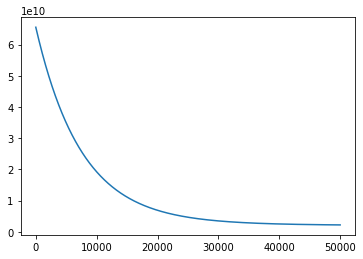

In [67]:
%matplotlib inline
plt.plot(xs, ys)
plt.show();

In [68]:
65591143309.8773/2215752346.973239

29.602199631865936

<code>**Combine now everything in one single class MLR**</code>

In [14]:
# Multivariate Linear Regression

uri = 'relative_path_to_source_file.extension'

def load_the_data():
    pass

class MLR: 
    def __init__(self, alpha, iterations):
        """
        Default values
        ----------
        Set 𝛼 to something small like .001
        Initialize your 𝜃's' parameters to zero or random values.  
        We need theta parameter for every input variable. 
        Since we have three input variable including X_0 (column of ones)
        Set your iterations to some arbitray number but not to small otherwise gradient descent will 
        not have enough time to converge.
        """    
        pass
    
    def feature_normalize(X):
        """
        Normalizes the features(input variables) in X matrix.
        Parameters
        ----------
        X : n dimensional array (matrix), shape (m_samples, n_features)
            Features(input variables) to be normalized.

        Returns
        -------
        X_norm : n dimensional array (matrix), shape (m_samples, n_features)
            A normalized version of X feature matrix.
        mu : n dimensional array (matrix), shape (n_features,)
            The mean value.
        sigma : n dimensional array (matrix), shape (n_features,)
            The standard deviation.
        
        Meta-sequance
        -------
        compute mu (mean value of matrix X) using np.mean()
        compute sigma (standart deviation of matrix X) using np.std
        compute normalization of x's 
        return compute normalized X matrix
        """
        pass
        
    def hypothesis(self, X):
        """
        build our model in this case its the 𝜃0*𝑥0 + 𝜃1*𝑥1 + 𝜃2*𝑥2
        and return it when called
        """    
        pass 
    
    def compute_cost(X, y, thetas):
        """
        Compute the cost of a particular choice of theta for linear regression.
      
        Input Parameters
        ----------------
        X : 2D array where each rows represent the training samples and each column represent the feature ndarray. 
        Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)
        y : 1D array of labels/target value for each traing example. dimension(1 x m)

        thetas : 1D array of fitting parameters or weights. Dimension (1 x n)

        Returns
        -------
        J : Scalar value.
        
        Meta-sequance
        -------
        make-predictions with some theta
        calculate square error difference between 𝑦̂  and y
        sum it all and multiply by average 1/(2 * m)
        return calculated value
        """
        pass
    
    def normal_equation():
        """
        OPTIONAL !
        """
        pass
    
    
    def gradient_descent(X, y, thetas, alpha, iterations):
        """
        Execute gradient descent for theta parameters optimization

        Input Parameters
        ----------------
        X : 2D array where each row represent the training samples and each column represent the feature ndarray. 
        Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)
        y : 1D array of labels/target value for each traing example. dimension(m x 1)
        theta : 1D array of fitting parameters or weights. Dimension (1 x n)
        alpha : Learning rate. Scalar value
        iterations: No of iterations. Scalar value. 

        Output Parameters
        -----------------
        theta : Final Value. 1D array of fitted parameters. Dimension (1 x n)
        cost_history: Contains value of cost for each iteration. 1D array. Dimansion(m x 1)
        
        Meta-sequance
        -------
        initialize cost history list and populate it with zeros using function np.zeros(no. of iterations)
        insert x_0 column where each entry is equal to 1 into X matrix as first feature column.
        loop through iterations
        register squared error sum
        find derivatives using vectorized form
        update theta
        insert computed cost of iteration into cost history by using loop index 
        return theta's and cost history
        
        """
        pass
    
    def visualize_cost_history(self, X):
        """
        cost_history contains the values of cost for every iteration performed during gradient descent
        If all our parameters are correct then cost should get reduced for every iteration(step)
        Plot the values of cost against number of iterations to visualize the performance of the Gradient Descent Algorithm
        
        Meta-sequance
        -------
        Just use matplolib plot () and provide x's as range of iterations and cost_history list as values for y's
        """
        
        pass
    
    def any_generic_function_that_you_want_your_class_to_perform(params):
        """
        Pretty self-explanatory
        """
        pass

if __name__ == '__main__':
      """ 
      load your data, extract from it features(x independant variables) and targets(y depenendat variables)
      on seperate variables, X uppercase denotes matrix, y lowercase denotes vector.
      Execute operations in a stepwise logic and don't forget to debug like printing intermmediate values
      in case of ambiguous issues.
      Your primary task is to choose different alpha candidates : 0.001-0.003, 0.01-0.03, 0.1-0.3, 1 
      and plot J(θ) with all learning rates.
      """


<code>**GOOD LUCK**</code>